In [2]:
from __future__ import absolute_import, division, print_function
from builtins import *  # @UnusedWildImport

from mcculw import ul
from mcculw.enums import DigitalIODirection, ScanOptions, Status, FunctionType, BoardInfo
from mcculw.device_info import DaqDeviceInfo

from ctypes import cast, POINTER, c_ushort
from math import pi, sin, exp
from time import *
from scipy import signal      

import numpy as np
import pyvisa as visa 
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
try:
    from console_examples_util import config_first_detected_device
except ImportError:
    from .console_examples_util import config_first_detected_device

In [4]:
#calculate rate and insert cycle time of scan data
#initial function for start up value set to zero in form of dataframe
def Data_initial():
    global dataframe_data, points_per_channel, ao_range, board_num, low_chan, high_chan, num_chans, memhandle, ao_info, total_count, rate
    
    #Initail calculation data
    ####################################################
    rate = 500000
    points_per_channel = int(rate*times)
    ####################################################
    
    #Board initail info
    ####################################################
    dev_id_list = []
    board_num = 0
    memhandle = None
    config_first_detected_device(board_num, dev_id_list)
    daq_dev_info = DaqDeviceInfo(board_num)
    ao_info = daq_dev_info.get_ao_info()
    ao_range = ao_info.supported_ranges[0]
    low_chan = 0
    high_chan = min(3, ao_info.num_chans - 1)
    num_chans = high_chan - low_chan + 1
    total_count = points_per_channel * num_chans
    memhandle = ul.win_buf_alloc(total_count)
    ####################################################
    
    dataframe_data = pd.DataFrame({'AO0':np.zeros(points_per_channel), 'AO1':np.zeros(points_per_channel), 'AO2':np.zeros(points_per_channel), 'AO3':np.zeros(points_per_channel)})

In [98]:
def Set(end_time, next_value, dataframe_data_set):
    global start_time, start_value
    start_point = round((points_per_channel*(start_time))/times)
    end_point = round((points_per_channel*(end_time))/times)
    data_point=-start_point+end_point
    
    if start_point != 0:
        start_value = round(dataframe_data_set[start_point-1])
    else:
        start_value = 0

    start_time = end_time
    
    
    
    if start_value == next_value:
        data_ramp = next_value*np.ones(data_point+1)
    else :
        data_ramp = np.linspace(start_value, next_value, data_point+1)
        
    print(start_point, end_point, start_value, next_value,data_ramp)  
    j=0
    for i in range(start_point,end_point+1,1):
        dataframe_data_set[i]=data_ramp[j]
        j+=1
    return dataframe_data , start_time , start_value

In [99]:
def Analog_output_3():
    global start_time, start_value
    start_time = 0.0
    Set(0.1,3,dataframe_data.AO3)
    Set(0.200000,0,dataframe_data.AO3)
    Set(0.200002,4,dataframe_data.AO3)
    # Set(0.600004,5,dataframe_data.AO3)
    # Set(0.600006,6,dataframe_data.AO3)
    plt.plot(dataframe_data.AO3,color='purple')
    return dataframe_data.AO3


In [100]:
times=1
Data_initial()

Found 1 DAQ device(s):
  USB-1208HS-4AO (206B1F2) - Device ID = 198


In [101]:
b=np.arange(0,4,4)
b

array([0])

0 50000 0 3 [0.00000e+00 6.00000e-05 1.20000e-04 ... 2.99988e+00 2.99994e+00
 3.00000e+00]
50000 100000 3 0 [3.00000e+00 2.99994e+00 2.99988e+00 ... 1.20000e-04 6.00000e-05
 0.00000e+00]
100000 100001 0 4 [0. 4.]
0 50000 0 3 [0.00000e+00 6.00000e-05 1.20000e-04 ... 2.99988e+00 2.99994e+00
 3.00000e+00]
50000 100000 3 0 [3.00000e+00 2.99994e+00 2.99988e+00 ... 1.20000e-04 6.00000e-05
 0.00000e+00]
100000 100001 0 4 [0. 4.]


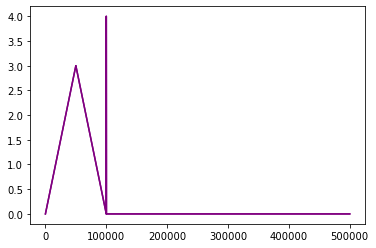

In [102]:
Analog_output_3()
a=np.array(Analog_output_3())

In [84]:
a[300001]

0.0